In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1,28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


**은닉층**<br>
입력층과 출력층 사이에 있는 모든 층
 * 분류: 클래스에 대한 확률을 출력하므로 활성화 함수 사용 (시그모이드, 렐루 함수 등)<br>
  모든 특성이 어느 정도 역할을 할 수 있도록 보장함
 * 회귀: 선형 방정식의 계산을 그대로 출력하므로 활성화 함수가 필요 없음



In [5]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))        #은닉층
dense2 = keras.layers.Dense(10, activation='softmax', name='out')                 #출력층
model = keras.Sequential([dense1, dense2])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 out (Dense)                 (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**summary()**<br>
* Output Shape에서 첫 차원(배치 차원) = 샘플 개수<br>
기본적으로 미니배치 경사 하강법을 수행하는 모델<br>
* Output Shape에서 둘째 차원 = 뉴런 개수
* Param: 모델 파라미터 개수<br>
이전 층 뉴런 개수 \* 현재 층 뉴런 개수 + 현재 층의 절편<br>
ex: Layer dense_n: (28\*28) \* 100 + 100 = 78500<br>
&emsp; Layer 'out': 100 \* 10 + 10 = 1010

In [6]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name = 'aaaaaaaaaaaaaaaaaaaaaaa')
model.summary()

Model: "aaaaaaaaaaaaaaaaaaaaaaa"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5711 - accuracy: 0.8060
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4110 - accuracy: 0.8521
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3770 - accuracy: 0.8640
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3538 - accuracy: 0.8717
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3366 - accuracy: 0.8781


**렐루 함수**<br>
Rectified Linear Unit = max(0,z)
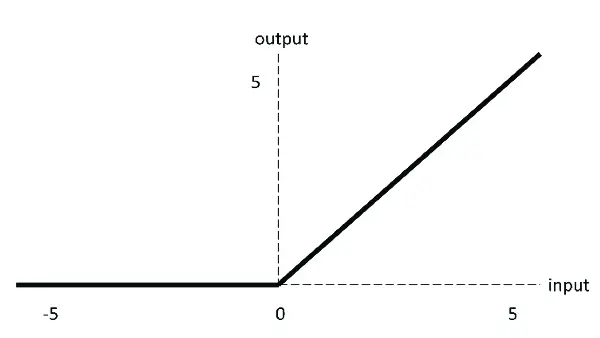

In [10]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))                              #입력 차원을 일렬로 펼치는 역할, 사실상 reshape(-1,28*28)과 같음 / 이를 층처럼 입력층과 은닉층 사이에 추가
model.add(keras.layers.Dense(100, activation='relu', name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
#train_scaled = train_scaled.reshape(-1,28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [12]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5383 - accuracy: 0.8104
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3943 - accuracy: 0.8591
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3531 - accuracy: 0.8714
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3341 - accuracy: 0.8807
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3179 - accuracy: 0.8862


**하이퍼파라미터**<br>
 * 밀집층
  * 은닉층의 개수
  * 은닉층 각각의 뉴런 개수
  * 층 각각의 활성화 함수
 * 경사 하강법
  * 미니배치 개수
  * 에포크 횟수
  * 옵티마이저 (다양한 종류의 경사 하강법 알고리즘; 기본 = RMSprop)
  * 학습률


**옵티마이저**<br>
기본 경사 하강법 옵티마이저
 * SGD
 * 모멘텀 최적화 (이전의 그레이디언트를 가속도처럼 사용)
 * 네스테로프 모멘텀 최적화 (모멘텀 최적화 x2)

적응적 학습률 옵티마이저 - 최적점에 가까이 갈수록 학습률을 낮춤
 * RMSprop
 * Adagrad
 * Adam (모멘텀 최적화 + RMSprop)

In [ ]:
#model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy') # 'sgd' -> 자동으로 SGD 객체를 만듦
sgd = keras.optimizers.SGD(learning_rate = 0.1, nestrov = True)
adagrad = keras.optimizers.Adagrad()
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')


In [13]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu', name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5165 - accuracy: 0.8192
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3915 - accuracy: 0.8586
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3528 - accuracy: 0.8714
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3261 - accuracy: 0.8805
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.3526 - accuracy: 0.8746


[0.35256487131118774, 0.8745833039283752]